In [1]:
import datetime as dt
import subprocess
import numpy as np
import os
import placesEvie as places
import glob
import time
import sys
import arrow
import netCDF4 as nc
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
import numpy as np
import gsw
import matplotlib.pyplot as plt
import seawater as sw
import netCDF4 as nc
%matplotlib inline

In [18]:
# w = nc.Dataset('/data/tjarniko/results/BR_1st_2015/ncs/SKOG_1d_20151127_20151231_ptrc_T_20151231-20151231.nc')
# depth = (w['deptht'][:])

w2 = nc.Dataset('EVIE_PLACES_ptrc_04jan13.nc')
print(w2['Deep Bay']['ciliates_timeseries'][:])

[0.12753427 0.1391318  0.15112984 0.13797402 0.13824183 0.13600802
 0.13638125 0.13448863 0.13117288 0.12316234 0.11501502 0.11273722
 0.1099534  0.10876552 0.10590866 0.10308766 0.10051402 0.09800687
 0.09757241 0.09676868 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [20]:
w2 = nc.Dataset('EVIE_PLACES_prod_01jan13.nc')
print(w2['Deep Bay']['PPPHY_timeseries'][:])

[4.8108404e-07 5.4236682e-07 5.5249478e-07 5.4630090e-07 5.3945325e-07
 5.2414231e-07 5.0650095e-07 4.7647458e-07 4.4662926e-07 4.1792910e-07
 3.8889794e-07 3.6772343e-07 3.4163511e-07 3.1922343e-07 2.9757734e-07
 2.7042850e-07 2.4909400e-07 2.2584604e-07 2.0220526e-07 1.7608707e-07
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


In [19]:
w2 = nc.Dataset('EVIE_PLACES_ptrc_04jan13.nc')
print(w2['Deep Bay']['ciliates_timeseries'][:])

[0.12896843 0.13724056 0.137447   0.13420756 0.13230515 0.13019626
 0.1269085  0.12312844 0.11946406 0.11558687 0.11150673 0.11029599
 0.10704217 0.10605326 0.10506669 0.10186756 0.09969392 0.09772235
 0.09748641 0.09641048 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [14]:
resdir = '/results/SalishSea/hindcast.201905/16aug16/'
w = nc.Dataset(resdir + 'SalishSea_1d_20160816_20160816_prod_T.nc')
print(w)
w2 = nc.Dataset(resdir + 'SalishSea_1h_20160816_20160816_ptrc_T.nc')
print(w2['ciliates'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1d_20160816_20160820
    description: smelt diagnostics A
    title: smelt diagnostics A
    Conventions: CF-1.6
    timeStamp: 2019-Sep-29 14:09:25 GMT
    uuid: 807d45e0-095f-4320-a432-2a674d9b6bd5
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(1)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 PPDIAT(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 PPPHY(time_counter,deptht,y,x), float32 PPMRUB(time_counter,deptht,y,x), float32 PPDIATNO3(time_counter,deptht,y,x), float32 PPPHYNO3(time_

In [5]:
print(w)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1d_20160816_20160820
    description: smelt diagnostics A
    title: smelt diagnostics A
    Conventions: CF-1.6
    timeStamp: 2019-Sep-29 14:09:25 GMT
    uuid: 807d45e0-095f-4320-a432-2a674d9b6bd5
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(1)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 PPDIAT(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 PPPHY(time_counter,deptht,y,x), float32 PPMRUB(time_counter,deptht,y,x), float32 PPDIATNO3(time_counter,deptht,y,x), float32 PPPHYNO3(time_

In [4]:
print(w['PPDIAT'])

<class 'netCDF4._netCDF4.Variable'>
float32 PPDIAT(time_counter, deptht, y, x)
    long_name: Primary production of diatoms
    units: mmol N/m3/s
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (1, 40, 898, 398)
filling on


In [3]:
plcnamesf = ['CortesMarina','DeepBay','FannyBay','LasquetiIsland','LundDesolationSound',\
           'MainSoG','MapleBay','MouthofOkeover','NanooseBay','NorthernBaynes',\
           'SaltSpring','SouthernBaynes']

In [4]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tdepth = np.ravel(depth_this)
    
    tpressure[:] = pres_atm
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

In [5]:
for p in range(0,len(plcnamesf)):
    tplc = plcnamesf[p]
    print(tplc)
    t_ncname = tplc + '_2015TS.nc'
    print(t_ncname)
    t_nc = nc.Dataset(t_ncname)

CortesMarina
CortesMarina_2015TS.nc
DeepBay
DeepBay_2015TS.nc
FannyBay
FannyBay_2015TS.nc
LasquetiIsland
LasquetiIsland_2015TS.nc
LundDesolationSound
LundDesolationSound_2015TS.nc
MainSoG
MainSoG_2015TS.nc
MapleBay
MapleBay_2015TS.nc
MouthofOkeover
MouthofOkeover_2015TS.nc
NanooseBay
NanooseBay_2015TS.nc
NorthernBaynes
NorthernBaynes_2015TS.nc
SaltSpring
SaltSpring_2015TS.nc
SouthernBaynes
SouthernBaynes_2015TS.nc


In [6]:
t = nc.Dataset('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/For_Evie/FannyBay_2015TS.nc')

In [19]:
ta = t['model_output']['local_TA']
dic = t['model_output']['local_DIC']
sal = t['model_output']['local_SAL']
temp = t['model_output']['local_TEMP']
depth_ar = np.zeros_like(temp)

for i in range(0,365):
    depth_ar[i,:] = depth
pHr, OmAr, pco2r = oned_moxy(sal, temp, dic, ta, 1, depth_ar)

print(pHr.shape)

(365, 40)


In [26]:
depth

array([   0.5000003 ,    1.5000031 ,    2.50001144,    3.50003052,
          4.50007057,    5.50015068,    6.50031042,    7.50062323,
          8.50123596,    9.50243282,   10.50476551,   11.50931168,
         12.51816654,   13.53541183,   14.56898212,   15.63428783,
         16.76117325,   18.00713539,   19.48178482,   21.38997841,
         24.10025597,   28.22991562,   34.68575668,   44.51772308,
         58.48433304,   76.58558655,   98.06295776,  121.86651611,
        147.08946228,  173.11448669,  199.57304382,  226.26029968,
        253.06663513,  279.93453979,  306.834198  ,  333.75018311,
        360.67453003,  387.60321045,  414.53408813,  441.46609497], dtype=float32)

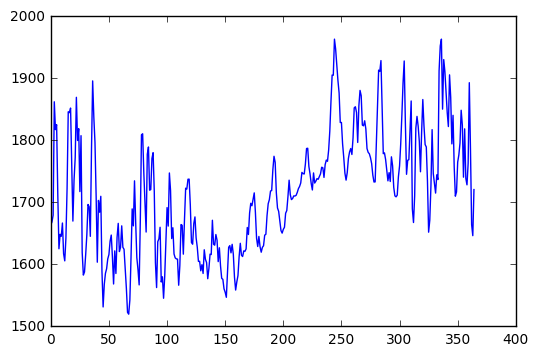

In [9]:
plt.plot(dic[:,0])

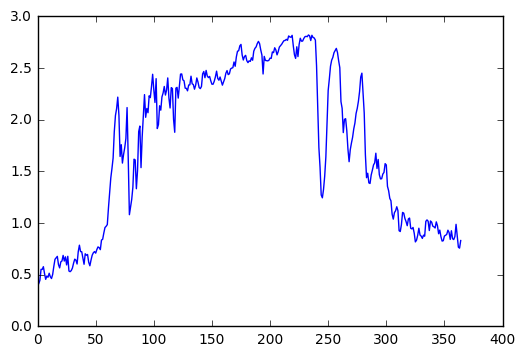

In [10]:
plt.plot(OmAr[:,0])

In [11]:
plcnamesf = ['CortesMarina','DeepBay','FannyBay','LasquetiIsland','LundDesolation Sound',\
           'MainSoG','MapleBay','MouthofOkeover','NanooseBay','NorthernBaynes',\
           'SaltSpring','SouthernBaynes']

w = nc.Dataset('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/For_Evie/MainSoG_2015TS.nc')

In [20]:
plcnames = ['Cortes/Marina','Deep Bay','Fanny Bay','Lasqueti Island','Lund/Desolation Sound',\
           'Main SoG','Maple Bay','Mouth of Okeover','Nanoose Bay','Northern Baynes',\
           'Salt Spring','Southern Baynes']

plcnamesf = ['CortesMarina','DeepBay','FannyBay','LasquetiIsland','LundDesolationSound',\
           'MainSoG','MapleBay','MouthofOkeover','NanooseBay','NorthernBaynes',\
           'SaltSpring','SouthernBaynes']


for p in range(0,len(plcnames)):
    
    tplc = plcnames[p]
    tplcf = plcnamesf[p]
    t_ncname = tplcf + '_2015TS.nc'
    t_nc = nc.Dataset(t_ncname)
    print(t_ncname)

    ta = t['model_output']['local_TA']
    dic = t['model_output']['local_DIC']
    sal = t['model_output']['local_SAL']
    temp = t['model_output']['local_TEMP']
    depth_ar = np.zeros_like(temp)

    for i in range(0,365):
        depth_ar[i,:] = depth
    print('m')    
    pHr, OmAr, pco2r = oned_moxy(sal, temp, dic, ta, 1, depth_ar)
    
    ncname = tplcf + '_2015TS_pH_OmAr.nc'
    f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
    g = f.createGroup('model_output')
    #g.createDimension('days', len(NO3_mod))
    g.createDimension('days', 365)
    g.createDimension('depths', 40)
    ts = g.createVariable('local_pH','f4',('days','depths'))
    ts[:] = pHr
    ts2 = g.createVariable('local_OmA','f4',('days','depths'))
    ts2[:] = OmAr
    f.close()

CortesMarina_2015TS.nc
m
DeepBay_2015TS.nc
m
FannyBay_2015TS.nc
m
LasquetiIsland_2015TS.nc
m
LundDesolationSound_2015TS.nc
m
MainSoG_2015TS.nc
m
MapleBay_2015TS.nc
m
MouthofOkeover_2015TS.nc
m
NanooseBay_2015TS.nc
m
NorthernBaynes_2015TS.nc
m
SaltSpring_2015TS.nc
m
SouthernBaynes_2015TS.nc
m


In [22]:
w = nc.Dataset('SaltSpring_2015TS_pH_OmAr.nc')
print(w)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: model_output



In [23]:
pH = (w['model_output']['local_pH'])

In [27]:
ncname =  'SalishSea_depths.nc'
f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
#g.createDimension('days', len(NO3_mod))
g.createDimension('depths', 40)
ts = g.createVariable('local_depth','f4',('depths'))
ts[:] = depth

f.close()